<a href="https://colab.research.google.com/github/ZenaNBamboat/schulich_data_science/blob/main/MMAI6110_Assignment_1_ZenaNBamboat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zena Nozar Bamboat

MMAI 6110 Assignment 1: Data Exploration NYC Airbnb 2025-2024

Hypothesis
That the short term rental market in NYC is heavely influenced by affordability over luxery. Despite higher prices year around it is predicted Hotel rooms will be booked less ofter due to low demands. Private rooms will have a higher booking rate since affordability is a huge economic indicator. It is also presumed winter seasons would generate lower number of bookings comparative to summer months, a spike could be seen in December due to festivities.

Data Bias Considerations
While working with the Airbnb dataset, I came across a few important limitations that could influence the interpretation of results:

Coverage Bias: This dataset only reflects short-term rental listings on Airbnb. It doesn’t account for other platforms or traditional long-term rentals, which means we’re only seeing part of the housing and rental landscape in NYC.

Activity Bias: Metrics like the number of reviews or availability don’t necessarily represent actual bookings. Some stays may not result in reviews, and availability doesn’t confirm demand.

Duplicate Listings: There may be cases where the same property is listed multiple times, which could overstate the number of available rentals or skew pricing data.

Seasonality: Not all listings are active year-round. Some might only appear during peak seasons, so monthly comparisons need to be normalized accordingly.

Host Type Bias: Professional hosts who manage multiple properties may behave differently from individual or occasional hosts. This distinction can influence pricing, availability, and overall trends, which is why I’ve considered segmenting hosts where relevant.



I’ve taken these biases into account and applied filters and checks to minimize their impact where possible.

Data Dictionary

To guide my analysis, I referred to the Airbnb data dictionary and focused on the following key variables:

price: The nightly rate for each listing. This was initially in string format and cleaned by removing symbols and converting it into a float to enable numerical analysis.

occupancy_rate: How frequently a listing is booked. It was estimated by comparing the number of days marked unavailable in the calendar data to the total number of days.

room_type: The type of accommodation offered (e.g., Entire home/apt, Private room, Shared room). This helped segment trends across different types of stays.

month: Represents the month of data collection for each listing. This allowed me to study time-based patterns like seasonality or pricing shifts.

id / listing_id: Unique identifiers used to match and de-duplicate listings. I used functions like nunique() to identify and remove duplicate entries for cleaner, unbiased results.

days_available: Total number of days a listing was available for booking in a given month. This gave insight into host activity levels and short/long-term rental behavior.

last_scraped: The date when the data was extracted from Airbnb. This helped validate the freshness and relevance of each data point.

Ensuring what each column meant, intensifies my case analysis and avoids misinterpretation.

In [4]:
#STEP 1, upload Listings and Calendar zip files for 12 monthly listings.csv.gz and 12 calendar.csv.gz

from google.colab import files
uploaded = files.upload()  # Uploaded 24 clean .csv.gz files with no duplicate file

Saving calendar (1).csv.gz to calendar (1).csv.gz
Saving calendar (2).csv.gz to calendar (2).csv.gz
Saving calendar (3).csv.gz to calendar (3).csv.gz
Saving calendar (4).csv.gz to calendar (4).csv.gz
Saving calendar (5).csv.gz to calendar (5).csv.gz
Saving calendar (6).csv.gz to calendar (6).csv.gz
Saving calendar (7).csv.gz to calendar (7).csv.gz
Saving calendar (8).csv.gz to calendar (8).csv.gz
Saving calendar (9).csv.gz to calendar (9).csv.gz
Saving calendar (10).csv.gz to calendar (10).csv.gz
Saving calendar (11).csv.gz to calendar (11).csv.gz
Saving calendar.csv.gz to calendar.csv.gz
Saving listings (1).csv.gz to listings (1).csv.gz
Saving listings (2).csv.gz to listings (2).csv.gz
Saving listings (3).csv.gz to listings (3).csv.gz
Saving listings (4).csv.gz to listings (4).csv.gz
Saving listings (5).csv.gz to listings (5).csv.gz
Saving listings (6).csv.gz to listings (6).csv.gz
Saving listings (7).csv.gz to listings (7).csv.gz
Saving listings (8).csv.gz to listings (8).csv.gz
Savi

In [5]:
#Import the libraries needed for analysis
import pandas as pd
import gzip
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [6]:
#STEP 2, merge each month's listings with its corresponding calendar file
#Example, merge listing of May 2025 file with calendar of May 2025 file

listing_files = sorted([f for f in os.listdir() if 'listings' in f and f.endswith('.csv.gz')])
calendar_files = sorted([f for f in os.listdir() if 'calendar' in f and f.endswith('.csv.gz')])

monthly_data = []

for l_file, c_file in zip(listing_files, calendar_files):
    print(f"\nMerging: {l_file} + {c_file}")

    #Read listings file
    with gzip.open(l_file, 'rt', encoding='utf-8') as lf:
        listings = pd.read_csv(lf, low_memory=False)
        listings['id'] = listings['id'].astype(str) #covert to string
        listings = listings.drop_duplicates(subset='id')
        listings['last_scraped'] = pd.to_datetime(listings['last_scraped'], errors='coerce')

    #Read calendar file and clean the data
    with gzip.open(c_file, 'rt', encoding='utf-8') as cf:
        calendar = pd.read_csv(cf, usecols=['listing_id', 'date', 'available'], low_memory=False)
        calendar['listing_id'] = calendar['listing_id'].astype(str)
        calendar['date'] = pd.to_datetime(calendar['date'])
        calendar['available'] = calendar['available'].map({'t': 1, 'f': 0})

    #Compute occupancy rate
    occupancy = calendar.groupby('listing_id')['available'].agg(
        days_available='sum',
        total_days='count'
    ).reset_index()
    occupancy['occupancy_rate'] = 1 - (occupancy['days_available'] / occupancy['total_days'])

    #Merge listing with its calendar data into a main dataframe
    merged = listings.merge(occupancy, how='left', left_on='id', right_on='listing_id')
    merged['month'] = listings['last_scraped'].dt.to_period('M')
    monthly_data.append(merged)


Merging: listings (1).csv.gz + calendar (1).csv.gz

Merging: listings (10).csv.gz + calendar (10).csv.gz

Merging: listings (11).csv.gz + calendar (11).csv.gz

Merging: listings (2).csv.gz + calendar (2).csv.gz

Merging: listings (3).csv.gz + calendar (3).csv.gz

Merging: listings (4).csv.gz + calendar (4).csv.gz

Merging: listings (5).csv.gz + calendar (5).csv.gz

Merging: listings (6).csv.gz + calendar (6).csv.gz

Merging: listings (7).csv.gz + calendar (7).csv.gz

Merging: listings (8).csv.gz + calendar (8).csv.gz

Merging: listings (9).csv.gz + calendar (9).csv.gz

Merging: listings.csv.gz + calendar.csv.gz


In [7]:
#STEP 3, Combine all months into one main dataframe

combined_df = pd.concat(monthly_data, ignore_index=True)
combined_df = combined_df.dropna(subset=['price'])
combined_df['price'] = combined_df['price'].replace('[\$,]', '', regex=True).astype(float)


In [8]:
#check for duplicate data as they will cause biases in the readings
print("Combined data shape:", combined_df.shape)
print("Unique listings:", combined_df['id'].nunique())
print("Duplicates found:", combined_df['id'].duplicated().sum())

Combined data shape: (273593, 84)
Unique listings: 34402
Duplicates found: 239191


The results display that there are serveral duplicate listings in the data entry.
Clean data would mean,

**Number of unique listings = total data rows**




In [23]:
#Preview main data set
combined_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,days_available,total_days,occupancy_rate,month
0,2539,https://www.airbnb.com/rooms/2539,20250401230149,2025-04-02,city scrape,Superfast Wi-Fi. Clean & quiet home by the park,Renovated apt home in elevator building.,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/3949d073-a02e...,2787,...,4,0,4,0,0.08,2539,358.0,365.0,0.019178,2025-04
1,6872,https://www.airbnb.com/rooms/6872,20250401230149,2025-04-02,city scrape,Uptown Sanctuary w/ Private Bath (Month to Month),This charming distancing-friendly month-to-mon...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,...,2,0,2,0,0.03,6872,83.0,365.0,0.772603,2025-04
3,7801,https://www.airbnb.com/rooms/7801,20250401230149,2025-04-02,city scrape,Sunny Williamsburg Loft with Sauna,A huge loft in a repurposed factory building i...,We've lived here for over 15 years and love Wi...,https://a0.muscache.com/pictures/miso/Hosting-...,21207,...,1,1,0,0,0.07,7801,0.0,365.0,1.000000,2025-04
4,8490,https://www.airbnb.com/rooms/8490,20250401230149,2025-04-02,city scrape,"Maison des Sirenes1,bohemian, luminous apartment",Soak up the modern and vintage charm<br />of t...,NaN,https://a0.muscache.com/pictures/1d0d9773-c829...,25183,...,2,2,0,0,1.00,8490,165.0,365.0,0.547945,2025-04
5,9357,https://www.airbnb.com/rooms/9357,20250401230149,2025-04-02,city scrape,Midtown Pied-a-terre,PLEASE DO NOT REQUEST TO BOOK UNTIL WE HAVE ME...,Quiet residential block near many restaurants ...,https://a0.muscache.com/pictures/90036/4e60665...,30193,...,1,1,0,0,0.31,9357,0.0,365.0,1.000000,2025-04


In [25]:
# Show all column names
print(combined_df.columns.tolist())



['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil


# STEP 4: Main dataframe Visualization and insights for all 12 months May 2025 to June 2024

In [10]:
#Summary table based on the listing type with price and its occupancy rate at which its booked
# Summary table: Avg price and occupancy by room type
summary_table = combined_df.groupby('room_type')[['price', 'occupancy_rate']].mean().round(3)
print("\nSummary Table: Average Price and Occupancy Rate by Room Type")
display(summary_table)



Summary Table: Average Price and Occupancy Rate by Room Type


,price,occupancy_rate
room_type,,
Entire home/apt,274.882,0.339
Hotel room,457.948,0.249
Private room,139.548,0.366
Shared room,121.565,0.306


The summary table shows hotel rooms as being the highest priced with the lowest occupancy rate, around 25%, amongst the others in the category. Additionally, private rooms are mostly booked on an average of 36.6% reflecting strong demand for affordable stays at dollars 140 a night. Entire homes are the middle point in price and occupancy rate. This could be due to less number of families travelling to New York. Shared rooms have a niche appeal they have an average of dollars 122 per night with an occupancy of 31% booked. It appealed more to people than hotels.

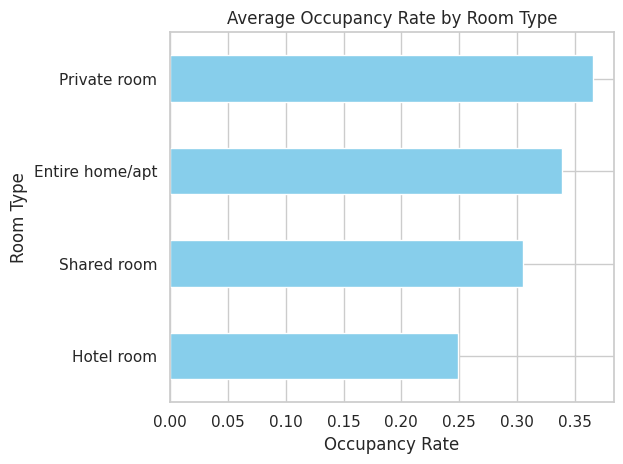

In [11]:
#Average occupancy/booking rate by the type of listing
occ_by_type = combined_df.groupby('room_type')['occupancy_rate'].mean().sort_values()
occ_by_type.plot(kind='barh', color='skyblue')
plt.title('Average Occupancy Rate by Room Type')
plt.xlabel('Occupancy Rate')
plt.ylabel('Room Type')
plt.tight_layout()
plt.show()


Average Occupancy Rate by Room type is the average type of listings occupied on the platform in New York. Private rooms have a significantly higher occupancy than other room types. Private rooms are more affordable in New York than entire homes. Hotel rooms are significantly higher priced than the rest shown in the Average price per room type graph below. This means the lower the price, the higher the occupancy. People prefer budget friendly listings over comfort, luxury and privacy. Demographics of the people occupying the listings should also be considered. Younger people/students would be constrained by budgets. Guests staying for longer durations would also prefer staying in places other than hotels. Entire homes would also have higher rates and also could be listed seasonally by their owners. Based on the owner travelling and listing their apartment on Airbnb.
Overall, New York picked affordability over luxury.

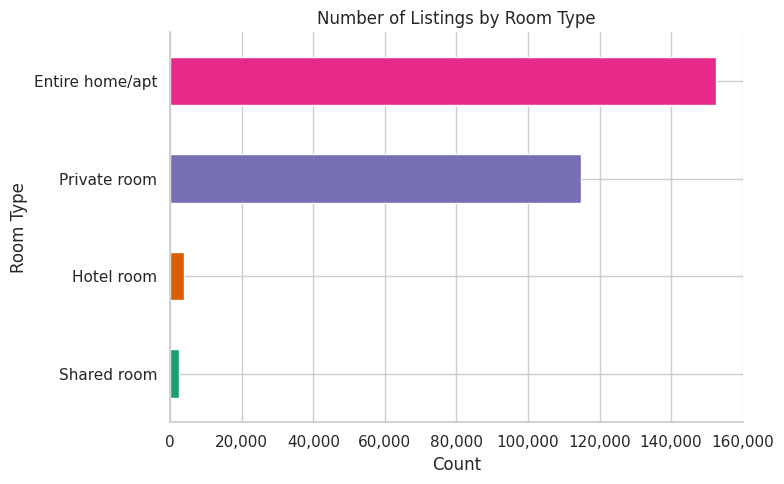

In [12]:
#Plot of number of listings per room type
#Group by room type and count
import matplotlib.ticker as mticker

room_counts = combined_df['room_type'].value_counts().sort_values()

fig, ax = plt.subplots(figsize=(8, 5))
room_counts.plot(kind='barh', color=sns.color_palette('Dark2'), ax=ax)

ax.spines[['top', 'right']].set_visible(False)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Add commas to tick labels

ax.set_title('Number of Listings by Room Type')
ax.set_xlabel('Count')
ax.set_ylabel('Room Type')
plt.tight_layout()
plt.show()


The number of Listings by Room type demonstrates the number of listings available on Airbnb. It shows what's more in supply than the other room types. In this case, it is evident that Entire homes make up nearly 50% of the listings, while Private room takes the second largest chunk. However, Hotel rooms and shared rooms account for less than 10% of the supply market. The majority of listings suggest Airbnb is positioned as a residential alternative to hotels. Another economic signal is most Airbnb homeowners are from wealthier demographics or seasonal property owners renting out extra space to students or tourists.

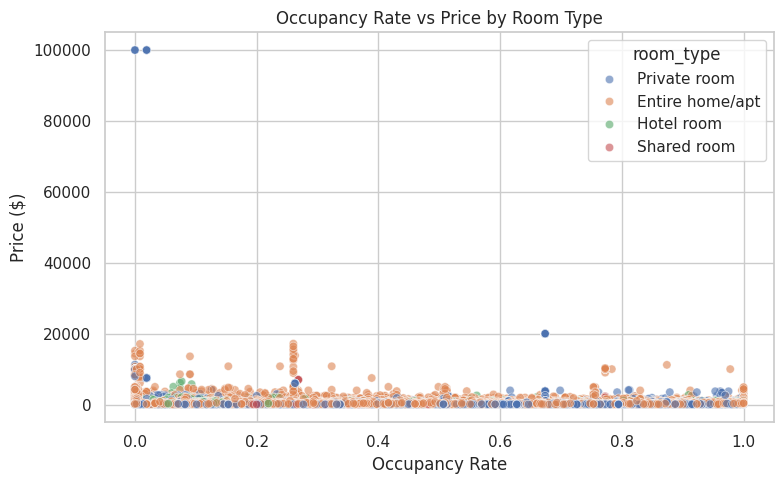

In [13]:
#Correlation of price with occupancy rate
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined_df, x='occupancy_rate', y='price', hue='room_type', alpha=0.6)
plt.title('Occupancy Rate vs Price by Room Type')
plt.xlabel('Occupancy Rate')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

Occupancy rate doesn't demonstrate a clear linear relationship with price.
We can observe Entire homes (orange) are more densely scattered across the price from low to high cost listings. Which indicated a larger range in pricing than other room types resulting in higher pricing flexibility.
Private rooms (blue) on the other hand are clustered in low prices with higher occupancy spread out. Demonstrating a demand for affordability.

In [14]:
#Correlation table for occupany and price
entire_home_df = combined_df[combined_df['room_type'] == 'Entire home/apt']
entire_home_df[['price', 'occupancy_rate']].describe()


,price,occupancy_rate
count,152527.000000,152526.000000
mean,274.882480,0.339253
std,397.311631,0.293330
min,10.000000,0.000000
25%,134.000000,0.071233
50%,198.000000,0.265753
75%,307.000000,0.569863
max,17182.000000,1.000000


The table above shows a broad price distribution, with the lowest range starting at dollars 10 per night to the highest at dollars 17182 per night. This shows the range of availability in listings tailored to a boarder demographic from a student, and budget traveller to a high-end client. The average price (mean) is around dollars 275 with half of the listings on the market priced around dollars 198. However, the occupancy rates are relatively low on average at 34%. With 25% of the listings booked less than 7% of the time. Flexible prices don't consistently generate bookings.

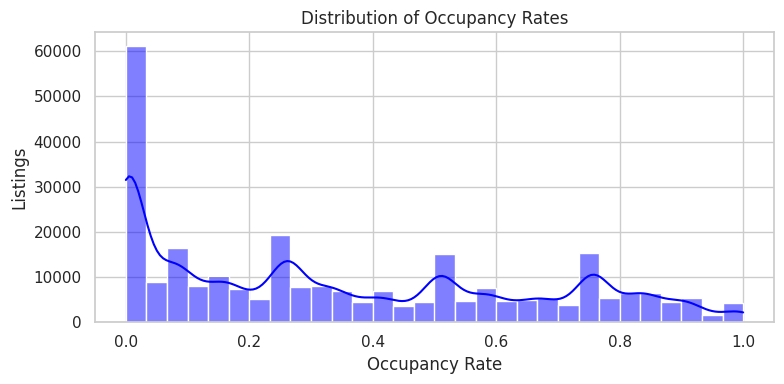

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(combined_df['occupancy_rate'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Occupancy Rates')
plt.xlabel('Occupancy Rate')
plt.ylabel('Listings')
plt.tight_layout()
plt.show()


Distribution of Occupancy rates, the distribution is right skewed, with most listings clustered at low occupancy rates. This is economically not the best signal for New York's rental market. A higher number of listings on the market are barely booked throughout the year. Small peaks around 70% to 100% occupancy indicate a few less than 10000 listings are running at full to less occupancy. This suggests seasonally active listings are more heavy in the market. Consistent spikes around 25%, 50% and 75% reflect part-time or professionally managed listings with strategic availability. It indicated platform efficiency as most listings run on 50% occupancy and show real host activity aside supply volume of the listings.

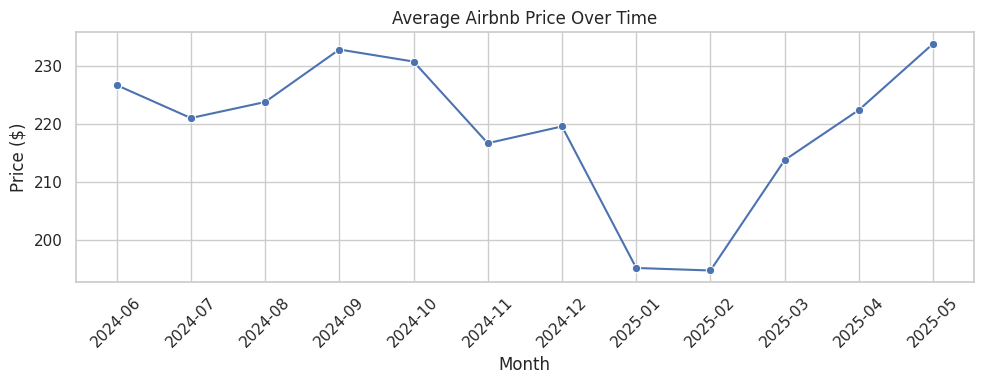

In [16]:
#Average price trend over the given year
avg_price = combined_df.groupby('month')['price'].mean().reset_index()
avg_price['month'] = avg_price['month'].astype(str)

plt.figure(figsize=(10, 4))
sns.lineplot(data=avg_price, x='month', y='price', marker='o')
plt.title('Average Airbnb Price Over Time')
plt.xlabel('Month')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Airbnb Price ($) over Time, based on the graph above it can be observed that average rentals tend to rise in summer months which would indicate higher tourist footfall in New York. A clear result of seasonal demand fluctuation in New York's rental market.

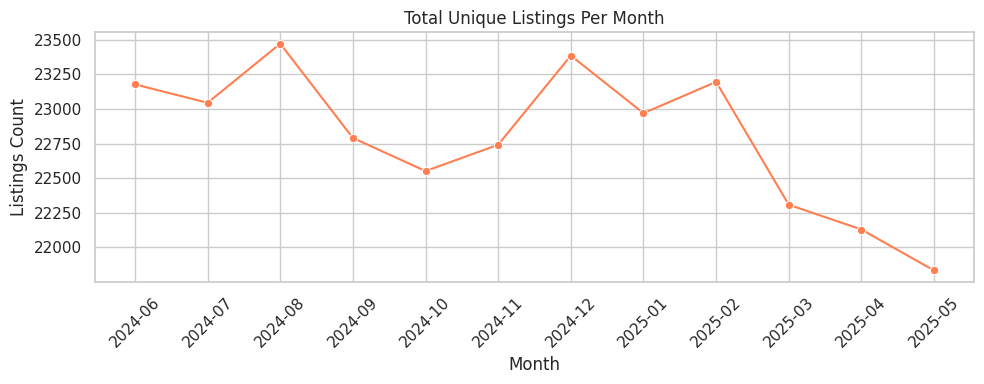

In [17]:
#Number of total listings per month
listing_volume = combined_df.groupby('month')['id'].nunique().reset_index()
listing_volume['month'] = listing_volume['month'].astype(str)

plt.figure(figsize=(10, 4))
sns.lineplot(data=listing_volume, x='month', y='id', marker='o', color='coral')
plt.title('Total Unique Listings Per Month')
plt.xlabel('Month')
plt.ylabel('Listings Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total Unique Listings per Month, its important to note these are unique listings taken in account with the applied in the formula above to remove any biases.
Indicators:
Fluctuations in the volume of listings available in the New York market.
Significant spike in the month of August and December could reflect seasonal hosting spikes. New hosts joining the Airbnb platform could be potential spikes, also could be due to potential incentives introduced by the platform.
The drops in the listings market could reflect delistings as some potential homeowners leave the platform or remove their homes from availability during off-peak months. Other reasons could be New York City regulation for short-term rentals resulting in delistings or Airbnb account suspensions.



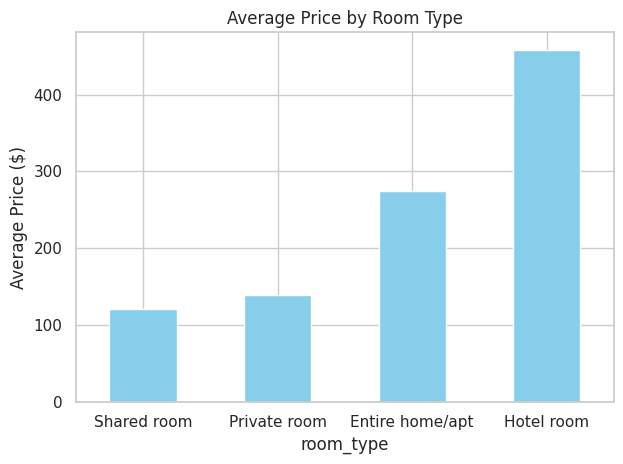

In [18]:
#Average price of a room based on its type
avg_price_room = combined_df.groupby('room_type')['price'].mean().sort_values()

avg_price_room.plot(kind='bar', color='skyblue')
plt.title('Average Price by Room Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Average price by Room type, the average pricing by room type has significantly always been observed by Hotel rooms. Even shown in other graphs. Average has been in the dollar 460 throughout. While Entire homes have been averaging around dollar 270. Private rooms and Shared rooms have a close average price point with dollars 130 and 120 respectively.
Entire homes would attract tourist staying in for longer durations or families with larger number of members. while private rooms remain the ones significantly more  afforable and attractive to budget travelers, students and solo guests.

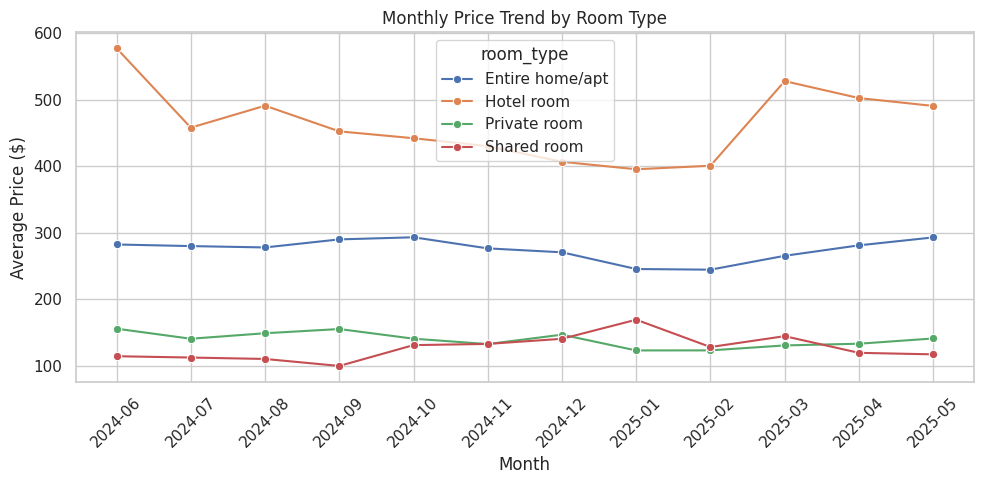

In [19]:
#Visualizing how prices change monthly for each room type

#Group by month and room_type to get average price
room_trend = combined_df.groupby(['month', 'room_type'])['price'].mean().reset_index()

room_trend['month'] = room_trend['month'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=room_trend, x='month', y='price', hue='room_type', marker='o')
plt.title('Monthly Price Trend by Room Type')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Monthly Price trend by Room type, obsevres that hotel room are highly voitile towards the months and spike/surge the most compared to other listings by room type. Hotel rooms have peaked during months of June up to dollars 580 per room maintaining elevated prices throughout. While off peak season hotel rooms have faced a significant drop down to dollars 390. More price voility.
Entire homes are second most expensive but observe more stable pricing hovering between dollars 240 to dollars 290 with seasonal spikes included.
Private rooms and Shared rooms intersect during November and December this could mean demand for private rooms could be greater during that time but the supply isn't enough they remain the popular option. That is where shared rooms see a spike in price to meet the demand. People would be choosing affordability over privacy.

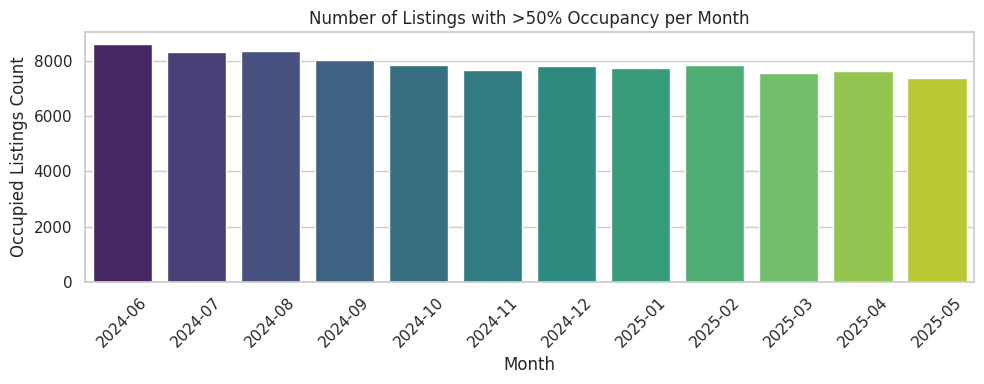

In [20]:
#Count of unique listings considered "occupied" if occupancy rate > 0.5
occupied_counts = combined_df[combined_df['occupancy_rate'] > 0.5].groupby('month')['id'].nunique().reset_index()
occupied_counts.rename(columns={'id': 'occupied_listings'}, inplace=True)

plt.figure(figsize=(10, 4))
sns.barplot(data=occupied_counts, x='month', y='occupied_listings', hue='month', palette='viridis', dodge=False, legend=False)
plt.title('Number of Listings with >50% Occupancy per Month')
plt.xlabel('Month')
plt.ylabel('Occupied Listings Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Number of Listings more than 50% occupany per month, it is observed that most occupied month has been June 2024 maybe due to seasonal demand. It is also observed during colder months from October to March there is a decline. However, a small spike in December could be due to december holidays. Higher tourist inflow. This graph strongly emphasizes New York faces seasonal fluctuations in booking demand. With higher demand during peak season and a decrease in demand during off-peak seasons. Nevertheless, the demand is always there throughout the months demonstrating strong demand for listings in New York. In recent months the occupancy could be going down due to tariffs and stricter border control implemented by the United States.